In [1]:
from calendar import month
from itertools import chain
from unicodedata import name
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Initialize the important variables

In [3]:
# get the data
myData = pd.read_json("transaction-data-adhoc-analysis.json")
df = pd.DataFrame(myData)

In [26]:
# Testing


,address,birthdate,mail,name,sex,username,transaction_items,transaction_value,transaction_date,January,...,March,April,May,June,July,August,September,October,November,December
0,USNS Wagner\nFPO AE 00917,1926/03/11,watsonbrenda@gmail.com,Jennifer Campbell,F,veronicawells,"['Exotic Extras,Beef Chicharon,(x4)']",5196,2022/01/12,True,...,False,False,False,False,False,False,False,False,False,False
1,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"['Exotic Extras,Beef Chicharon,(x3)', 'Healthy...",12056,2022/01/12,True,...,False,False,False,False,False,False,False,False,False,False
2,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"['HealthyKid 3+,Gummy Vitamins,(x3)', 'Healthy...",5500,2022/01/08,True,...,False,False,False,False,False,False,False,False,False,False
3,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"['HealthyKid 3+,Yummy Vegetables,(x1)']",500,2022/01/10,True,...,False,False,False,False,False,False,False,False,False,False
4,"33911 Hansen Loaf\nWest Sandra, ND 54188",1949/09/27,michael78@yahoo.com,Kristen Cooper,F,qhernandez,"['Candy City,Orange Beans,(x3)', 'Candy City,G...",2697,2022/01/24,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83031,"96081 Harrison Brooks\nJenniferbury, MA 02124",2019/10/26,christina55@hotmail.com,Tammy Byrd,F,kmcconnell,"['Exotic Extras,Kimchi and Seaweed,(x2)', 'Hea...",3588,2022/06/05,False,...,False,False,False,True,False,False,False,False,False,False
83032,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"['HealthyKid 3+,Yummy Vegetables,(x1)', 'Exoti...",2095,2022/06/12,False,...,False,False,False,True,False,False,False,False,False,False
83033,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"['Candy City,Orange Beans,(x4)', 'Candy City,G...",3396,2022/06/15,False,...,False,False,False,True,False,False,False,False,False,False
83034,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"['HealthyKid 3+,Nutrional Milk,(x2)', 'Candy C...",4280,2022/06/09,False,...,False,False,False,True,False,False,False,False,False,False


In [6]:
#Initialize Other Variables

In [7]:
# Will be needed to add columns later in the DataFrame
products = ['Beef Chicharon','Kimchi and Seaweed','Nutrional Milk','Gummy Vitamins','Yummy Vegetables','Orange Beans','Gummy Worms']
months = ['January', "February", "March", "April", "May", "June", "July", 'August', 'September', 'October', 'November', 'December']

In [8]:
# Separate Items by ';' to create a list of bought item in one transaction
df["transaction_items"] = df["transaction_items"].str.split(';')
df['transaction_items'] = df['transaction_items'].map(str)

In [10]:
# explode or "un-nest" the transaction_items column
df = df.explode('transaction_items')

In [11]:
# Create columns per each month
df[months[0]] = df['transaction_date'].str.contains('2022/01')
df[months[1]] = df['transaction_date'].str.contains('2022/02')
df[months[2]] = df['transaction_date'].str.contains('2022/03')
df[months[3]] = df['transaction_date'].str.contains('2022/04')
df[months[4]] = df['transaction_date'].str.contains('2022/05')
df[months[5]] = df['transaction_date'].str.contains('2022/06')
df[months[6]] = df['transaction_date'].str.contains('2022/07')
df[months[7]] = df['transaction_date'].str.contains('2022/08')
df[months[8]] = df['transaction_date'].str.contains('2022/09')
df[months[9]] = df['transaction_date'].str.contains('2022/10')
df[months[10]] = df['transaction_date'].str.contains('2022/11')
df[months[11]] = df['transaction_date'].str.contains('2022/12')

In [23]:
# Now we want to make the name as their index (to make the next operations a lot easier)
df_gN = df.reset_index().groupby("name").sum() 
# test
print(df_gN.head())

                index  transaction_value  January  February  March  April  \
name                                                                        
Aaron Beasley  287261              16981        0         0      0      2   
Aaron Brewer   281812              39931        1         1      1      2   
Aaron Brown    377172              39902        0         0      3      2   
Aaron Coffey   342050              33273        1         2      2      2   
Aaron Davis    520023              46583        1         1      0      3   

               May  June  July  August  September  October  November  December  
name                                                                            
Aaron Beasley    2     1     0       0          0        0         0         0  
Aaron Brewer     0     2     0       0          0        0         0         0  
Aaron Brown      1     1     0       0          0        0         0         0  
Aaron Coffey     2     0     0       0          0      

In [13]:
repeater_val = [0,0,0,0,0,0,0,0,0,0,0,0]
inactive_val = [0,0,0,0,0,0,0,0,0,0,0,0]
engage_val   = [0,0,0,0,0,0,0,0,0,0,0,0]

In [14]:
# Get Statuses of each month. If there is a value in their column it means that they buy something
df_gN[months[0]  + " Repeater"] = 0
df_gN[months[1]  + " Repeater"] = (df_gN[months[1]] > 0) & (df_gN[months[0]] > 0 )
df_gN[months[2]  + " Repeater"] = (df_gN[months[2]] > 0) & (df_gN[months[1]] > 0 )
df_gN[months[3]  + " Repeater"] = (df_gN[months[3]] > 0) & (df_gN[months[2]] > 0 )
df_gN[months[4]  + " Repeater"] = (df_gN[months[4]] > 0) & (df_gN[months[3]] > 0 )
df_gN[months[5]  + " Repeater"] = (df_gN[months[5]] > 0) & (df_gN[months[4]] > 0 )
df_gN[months[6]  + " Repeater"] = (df_gN[months[6]] > 0) & (df_gN[months[5]] > 0 )
df_gN[months[7]  + " Repeater"] = (df_gN[months[7]] > 0) & (df_gN[months[6]] > 0 )
df_gN[months[8]  + " Repeater"] = (df_gN[months[8]] > 0) & (df_gN[months[7]] > 0 )
df_gN[months[9]  + " Repeater"] = (df_gN[months[9]] > 0) & (df_gN[months[8]] > 0 )
df_gN[months[10] + " Repeater"] = (df_gN[months[10]] > 0) & (df_gN[months[9]] > 0 )
df_gN[months[11] + " Repeater"] = (df_gN[months[11]] > 0) & (df_gN[months[10]] > 0 )

In [16]:
df_stat = df_gN[[
    months[0]  + " Repeater",
    months[1]  + " Repeater",
    months[2]  + " Repeater",
    months[3]  + " Repeater",
    months[4]  + " Repeater",
    months[5]  + " Repeater",
    months[6]  + " Repeater",
    months[7]  + " Repeater",
    months[8]  + " Repeater",
    months[9]  + " Repeater",
    months[10] + " Repeater",
    months[11] + " Repeater"
]].copy()

In [17]:
# Create a DataFrame 
df_sum = pd.DataFrame(
    [
        [
            0,
            df_stat[months[1]  + " Repeater"].sum(),
            df_stat[months[2]  + " Repeater"].sum(),
            df_stat[months[3]  + " Repeater"].sum(),
            df_stat[months[4]  + " Repeater"].sum(),
            df_stat[months[5]  + " Repeater"].sum(),
            df_stat[months[6]  + " Repeater"].sum(),
            df_stat[months[7]  + " Repeater"].sum(),
            df_stat[months[8]  + " Repeater"].sum(),
            df_stat[months[9]  + " Repeater"].sum(),
            df_stat[months[10] + " Repeater"].sum(),
            df_stat[months[11] + " Repeater"].sum()
        ]
    ],
    columns=[
        months[0]  + " Repeater",
        months[1]  + " Repeater",
        months[2]  + " Repeater",
        months[3]  + " Repeater",
        months[4]  + " Repeater",
        months[5]  + " Repeater",
        months[6]  + " Repeater",
        months[7]  + " Repeater",
        months[8]  + " Repeater",
        months[9]  + " Repeater",
        months[10] + " Repeater",
        months[11] + " Repeater"
    ]
)

In [18]:
repeater_val[0] = 0
repeater_val[1] = df_stat[months[1]  + " Repeater"].sum()
repeater_val[2] = df_stat[months[2]  + " Repeater"].sum()
repeater_val[3] = df_stat[months[3]  + " Repeater"].sum()
repeater_val[4] = df_stat[months[4]  + " Repeater"].sum()
repeater_val[5] = df_stat[months[5]  + " Repeater"].sum()
repeater_val[6] = df_stat[months[6]  + " Repeater"].sum()
repeater_val[7] = df_stat[months[7]  + " Repeater"].sum()
repeater_val[8] = df_stat[months[8]  + " Repeater"].sum()
repeater_val[9] = df_stat[months[9]  + " Repeater"].sum()
repeater_val[10] = df_stat[months[10]  + " Repeater"].sum()
repeater_val[11] = df_stat[months[11]  + " Repeater"].sum()


In [21]:
print(df_sum.head())

   January Repeater  February Repeater  March Repeater  April Repeater  \
0                 0               5172            5216            5154   

   May Repeater  June Repeater  July Repeater  August Repeater  \
0          5110           5193              0                0   

   September Repeater  October Repeater  November Repeater  December Repeater  
0                   0                 0                  0                  0  


In [45]:
# Now we will use those data to compare if they are a repeater, inactive, or engage
# Now we got individual data values

In [31]:
# Next is to get the Inactive
df_gN[months[0]  + " Inactive"] = 0
df_gN[months[1]  + " Inactive"] = (df_gN[months[0]] > 0) & (df_gN[months[1]] == 0 )
df_gN[months[2]  + " Inactive"] = (df_gN[months[0]] > 0) | (df_gN[months[1]] > 0) & (df_gN[months[2]] == 0 )
df_gN[months[3]  + " Inactive"] = (df_gN[months[0]] > 0) | (df_gN[months[1]] > 0) | (df_gN[months[2]] > 0) & (df_gN[months[3]] == 0 )
df_gN[months[4]  + " Inactive"] = (df_gN[months[0]] > 0) | (df_gN[months[1]] > 0) | (df_gN[months[2]] > 0) | (df_gN[months[3]] > 0) & (df_gN[months[4]] == 0 )
df_gN[months[5]  + " Inactive"] = (df_gN[months[0]] > 0) | (df_gN[months[1]] > 0) | (df_gN[months[2]] > 0) | (df_gN[months[3]] > 0) | (df_gN[months[4]] > 0) & (df_gN[months[5]] == 0 )
df_gN[months[6]  + " Inactive"] = (df_gN[months[0]] > 0) | (df_gN[months[1]] > 0) | (df_gN[months[2]] > 0) | (df_gN[months[3]] > 0) | (df_gN[months[4]] > 0) | (df_gN[months[5]] > 0) & (df_gN[months[6]] == 0 )
df_gN[months[7]  + " Inactive"] = (df_gN[months[0]] > 0) | (df_gN[months[1]] > 0) | (df_gN[months[2]] > 0) | (df_gN[months[3]] > 0) | (df_gN[months[4]] > 0) | (df_gN[months[5]] > 0) | (df_gN[months[6]] > 0)  & (df_gN[months[7]] == 0 )
df_gN[months[8]  + " Inactive"] = (df_gN[months[0]] > 0) | (df_gN[months[1]] > 0) | (df_gN[months[2]] > 0) | (df_gN[months[3]] > 0) | (df_gN[months[4]] > 0) | (df_gN[months[5]] > 0) | (df_gN[months[6]] > 0)  | (df_gN[months[7]] > 0)  & (df_gN[months[8]] == 0 )
df_gN[months[9]  + " Inactive"] = (df_gN[months[0]] > 0) | (df_gN[months[1]] > 0) | (df_gN[months[2]] > 0) | (df_gN[months[3]] > 0) | (df_gN[months[4]] > 0) | (df_gN[months[5]] > 0) | (df_gN[months[6]] > 0)  | (df_gN[months[8]] > 0)  & (df_gN[months[9]] == 0 )
df_gN[months[10] + " Inactive"] = (df_gN[months[0]] > 0) | (df_gN[months[1]] > 0) | (df_gN[months[2]] > 0) | (df_gN[months[3]] > 0) | (df_gN[months[4]] > 0) | (df_gN[months[5]] > 0) | (df_gN[months[6]] > 0)  | (df_gN[months[8]] > 0)  | (df_gN[months[9]] > 0)  & (df_gN[months[10]] == 0 )
df_gN[months[11] + " Inactive"] = (df_gN[months[0]] > 0) | (df_gN[months[1]] > 0) | (df_gN[months[2]] > 0) | (df_gN[months[3]] > 0) | (df_gN[months[4]] > 0) | (df_gN[months[5]] > 0) | (df_gN[months[6]] > 0)  | (df_gN[months[8]] > 0)  | (df_gN[months[9]] > 0)  | (df_gN[months[10]] > 0) & (df_gN[months[11]] == 0 )

In [32]:
df_sum[months[0]  + " Inactive"] = df_gN[months[0]  + " Inactive"].sum()
df_sum[months[1]  + " Inactive"] = df_gN[months[1]  + " Inactive"].sum()
df_sum[months[2]  + " Inactive"] = df_gN[months[2]  + " Inactive"].sum()
df_sum[months[3]  + " Inactive"] = df_gN[months[3]  + " Inactive"].sum()
df_sum[months[4]  + " Inactive"] = df_gN[months[4]  + " Inactive"].sum()
df_sum[months[5]  + " Inactive"] = df_gN[months[5]  + " Inactive"].sum()
df_sum[months[6]  + " Inactive"] = df_gN[months[6]  + " Inactive"].sum()
df_sum[months[7]  + " Inactive"] = df_gN[months[7]  + " Inactive"].sum()
df_sum[months[8]  + " Inactive"] = df_gN[months[8]  + " Inactive"].sum()
df_sum[months[9]  + " Inactive"] = df_gN[months[9]  + " Inactive"].sum()
df_sum[months[10] + " Inactive"] = df_gN[months[10] + " Inactive"].sum()
df_sum[months[11] + " Inactive"] = df_gN[months[11] + " Inactive"].sum()

In [33]:
inactive_val[0] = 0
inactive_val[1] = df_gN[months[1]  + " Inactive"].sum()
inactive_val[2] = df_gN[months[2]  + " Inactive"].sum()
inactive_val[3] = df_gN[months[3]  + " Inactive"].sum()
inactive_val[4] = df_gN[months[4]  + " Inactive"].sum()
inactive_val[5] = df_gN[months[5]  + " Inactive"].sum()
inactive_val[6] = df_gN[months[6]  + " Inactive"].sum()
inactive_val[7] = df_gN[months[7]  + " Inactive"].sum()
inactive_val[8] = df_gN[months[8]  + " Inactive"].sum()
inactive_val[9] = df_gN[months[9]  + " Inactive"].sum()
inactive_val[10] = df_gN[months[10]  + " Inactive"].sum()
inactive_val[11] = df_gN[months[11]  + " Inactive"].sum()

In [37]:
print(df_sum[
    [
        months[0]  + " Inactive",
        months[1]  + " Inactive",
        months[2]  + " Inactive",
        months[3]  + " Inactive",
        months[4]  + " Inactive",
        months[5]  + " Inactive",
        months[6]  + " Inactive",
        months[7]  + " Inactive",
        months[8]  + " Inactive",
        months[9]  + " Inactive",
        months[10] + " Inactive",
        months[11] + " Inactive",
    ]
])



   January Inactive  February Inactive  March Inactive  April Inactive  \
0                 0               1416            6957            8125   

   May Inactive  June Inactive  July Inactive  August Inactive  \
0          8387           8470           8487             8487   

   September Inactive  October Inactive  November Inactive  December Inactive  
0                8487              8487               8487               8487  


In [38]:
# Next is to get the engage
df_gN[months[0]  + " Engage"] = 0
df_gN[months[1]  + " Engage"] = (df_gN[months[0]] > 0)
df_gN[months[2]  + " Engage"] = (df_gN[months[0]] > 0) & (df_gN[months[1]] > 0)
df_gN[months[3]  + " Engage"] = (df_gN[months[0]] > 0) & (df_gN[months[1]] > 0) & (df_gN[months[2]] > 0)
df_gN[months[4]  + " Engage"] = (df_gN[months[0]] > 0) & (df_gN[months[1]] > 0) & (df_gN[months[2]] > 0) & (df_gN[months[3]] > 0)
df_gN[months[5]  + " Engage"] = (df_gN[months[0]] > 0) & (df_gN[months[1]] > 0) & (df_gN[months[2]] > 0) & (df_gN[months[3]] > 0) & (df_gN[months[4]] > 0)
df_gN[months[6]  + " Engage"] = (df_gN[months[0]] > 0) & (df_gN[months[1]] > 0) & (df_gN[months[2]] > 0) & (df_gN[months[3]] > 0) & (df_gN[months[4]] > 0) & (df_gN[months[5]] > 0)
df_gN[months[7]  + " Engage"] = (df_gN[months[0]] > 0) & (df_gN[months[1]] > 0) & (df_gN[months[2]] > 0) & (df_gN[months[3]] > 0) & (df_gN[months[4]] > 0) & (df_gN[months[5]] > 0) & (df_gN[months[6]] > 0)
df_gN[months[8]  + " Engage"] = (df_gN[months[0]] > 0) & (df_gN[months[1]] > 0) & (df_gN[months[2]] > 0) & (df_gN[months[3]] > 0) & (df_gN[months[4]] > 0) & (df_gN[months[5]] > 0) & (df_gN[months[6]] > 0)  & (df_gN[months[7]] > 0)
df_gN[months[9]  + " Engage"] = (df_gN[months[0]] > 0) & (df_gN[months[1]] > 0) & (df_gN[months[2]] > 0) & (df_gN[months[3]] > 0) & (df_gN[months[4]] > 0) & (df_gN[months[5]] > 0) & (df_gN[months[6]] > 0)  & (df_gN[months[8]] > 0)
df_gN[months[10] + " Engage"] = (df_gN[months[0]] > 0) & (df_gN[months[1]] > 0) & (df_gN[months[2]] > 0) & (df_gN[months[3]] > 0) & (df_gN[months[4]] > 0) & (df_gN[months[5]] > 0) & (df_gN[months[6]] > 0)  & (df_gN[months[8]] > 0)  & (df_gN[months[9]] > 0) 
df_gN[months[11] + " Engage"] = (df_gN[months[0]] > 0) & (df_gN[months[1]] > 0) & (df_gN[months[2]] > 0) & (df_gN[months[3]] > 0) & (df_gN[months[4]] > 0) & (df_gN[months[5]] > 0) & (df_gN[months[6]] > 0)  & (df_gN[months[8]] > 0)  & (df_gN[months[9]] > 0)  & (df_gN[months[10]] > 0)


In [39]:
df_sum[months[0]  + " Engage"] = df_gN[months[0]  + " Engage"].sum()
df_sum[months[1]  + " Engage"] = df_gN[months[1]  + " Engage"].sum()
df_sum[months[2]  + " Engage"] = df_gN[months[2]  + " Engage"].sum()
df_sum[months[3]  + " Engage"] = df_gN[months[3]  + " Engage"].sum()
df_sum[months[4]  + " Engage"] = df_gN[months[4]  + " Engage"].sum()
df_sum[months[5]  + " Engage"] = df_gN[months[5]  + " Engage"].sum()
df_sum[months[6]  + " Engage"] = df_gN[months[6]  + " Engage"].sum()
df_sum[months[7]  + " Engage"] = df_gN[months[7]  + " Engage"].sum()
df_sum[months[8]  + " Engage"] = df_gN[months[8]  + " Engage"].sum()
df_sum[months[9]  + " Engage"] = df_gN[months[9]  + " Engage"].sum()
df_sum[months[10] + " Engage"] = df_gN[months[10] + " Engage"].sum()
df_sum[months[11] + " Engage"] = df_gN[months[11] + " Engage"].sum()

In [40]:
engage_val[0] = 0
engage_val[1] = df_gN[months[1]  + " Engage"].sum()
engage_val[2] = df_gN[months[2]  + " Engage"].sum()
engage_val[3] = df_gN[months[3]  + " Engage"].sum()
engage_val[4] = df_gN[months[4]  + " Engage"].sum()
engage_val[5] = df_gN[months[5]  + " Engage"].sum()
engage_val[6] = df_gN[months[6]  + " Engage"].sum()
engage_val[7] = df_gN[months[7]  + " Engage"].sum()
engage_val[8] = df_gN[months[8]  + " Engage"].sum()
engage_val[9] = df_gN[months[9]  + " Engage"].sum()
engage_val[10] = df_gN[months[10]  + " Engage"].sum()
engage_val[11] = df_gN[months[11]  + " Engage"].sum()

In [41]:
print(df_sum[
    [
        months[0]  + " Engage",
        months[1]  + " Engage",
        months[2]  + " Engage",
        months[3]  + " Engage",
        months[4]  + " Engage",
        months[5]  + " Engage",
        months[6]  + " Engage",
        months[7]  + " Engage",
        months[8]  + " Engage",
        months[9]  + " Engage",
        months[10] + " Engage",
        months[11] + " Engage",
    ]
])

   January Engage  February Engage  March Engage  April Engage  May Engage  \
0               0             6588          5172          4126        3289   

   June Engage  July Engage  August Engage  September Engage  October Engage  \
0         2667         2190              0                 0               0   

   November Engage  December Engage  
0                0                0  


In [42]:
df_cSum = pd.DataFrame(
    {
        months[0]:[repeater_val[0], engage_val[0], inactive_val[0]],
        months[1]:[repeater_val[1], engage_val[1], inactive_val[1]],
        months[2]:[repeater_val[2], engage_val[2], inactive_val[2]],
        months[3]:[repeater_val[3], engage_val[3], inactive_val[3]],
        months[4]:[repeater_val[4], engage_val[4], inactive_val[4]],
        months[5]:[repeater_val[5], engage_val[5], inactive_val[5]],
        months[6]:[repeater_val[6], engage_val[6], inactive_val[6]],
        months[7]:[repeater_val[7], engage_val[7], inactive_val[7]],
        months[8]:[repeater_val[8], engage_val[8], inactive_val[8]],
        months[9]:[repeater_val[9], engage_val[9], inactive_val[9]],
        months[10]:[repeater_val[10], engage_val[10], inactive_val[10]],
        months[11]:[repeater_val[11], engage_val[11], inactive_val[11]],
    },
    index=["Repeater", "Inactive", "Engage"]
)


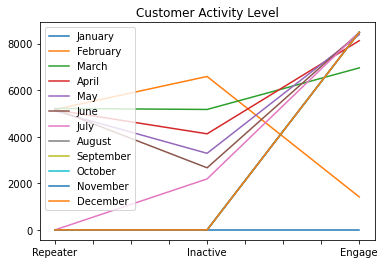

          January  February  March  April   May  June  July  August  \
Repeater        0      5172   5216   5154  5110  5193     0       0   
Inactive        0      6588   5172   4126  3289  2667  2190       0   
Engage          0      1416   6957   8125  8387  8470  8487    8487   

          September  October  November  December  
Repeater          0        0         0         0  
Inactive          0        0         0         0  
Engage         8487     8487      8487      8487  


In [44]:
df_cSum.plot.line(title="Customer Activity Level")
plt.show()


In [46]:
print(df_cSum.head())

          January  February  March  April   May  June  July  August  \
Repeater        0      5172   5216   5154  5110  5193     0       0   
Inactive        0      6588   5172   4126  3289  2667  2190       0   
Engage          0      1416   6957   8125  8387  8470  8487    8487   

          September  October  November  December  
Repeater          0        0         0         0  
Inactive          0        0         0         0  
Engage         8487     8487      8487      8487  
